In [351]:
library(ggplot2)
library(microbiome)
library(phyloseq)
library("tidyverse")
library("dplyr")
library(vegan)
library("lubridate")
library('PCAtools')
library("DESeq2")
library("GGally")
library("ggpmisc")

Loading required package: ggpp

Registered S3 methods overwritten by 'ggpp':
  method                  from   
  heightDetails.titleGrob ggplot2
  widthDetails.titleGrob  ggplot2


Attaching package: ‘ggpp’


The following object is masked from ‘package:ggplot2’:

    annotate


Registered S3 method overwritten by 'ggpmisc':
  method                  from   
  as.character.polynomial polynom



In [2]:
#load("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/data/POR_treatment_4_analysis.RData")
load("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/data/POR_counts_4_analysis.RData")
load("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/data/POR_taxo_4_analysis.RData")


In [5]:
meta = read.csv ("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_combo_meta.csv",
row.names=1, header = T)%>%
  mutate(
    Month = factor(Month, levels = month.name)
  ) %>%
  arrange(Month) %>%
arrange(collection_date)

In [6]:
head(meta, n=2)

,collection_date,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,Genotype,Fragment_number,Month,⋯,cluster_longitude,cluster_depth,Year.y,Month.y,Lat_decimal,Long_decimal,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>,⋯,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-584,1-Mar-19,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,3,March,⋯,-80.41658,15.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825
bagnumber-590,1-Mar-19,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,3,March,⋯,-80.41659,16.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825


In [7]:
## Need taxonomy and counts as matrices
taxo_mat <- as.matrix(POR_taxo_4_analysis)
count_mat <- as.matrix(POR_counts_4_analysis)

In [9]:
ASV <- otu_table(as.matrix(POR_counts_4_analysis), 
                 taxa_are_rows = T)
TAX <- tax_table(as.matrix(POR_taxo_4_analysis))
SAMP <- sample_data(meta)

ps <- phyloseq(ASV, TAX, SAMP)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 27534 taxa and 363 samples ]
sample_data() Sample Data:       [ 363 samples by 54 sample variables ]
tax_table()   Taxonomy Table:    [ 27534 taxa by 7 taxonomic ranks ]

In [10]:
microbiome::summarize_phyloseq(ps)

Compositional = NO2

1] Min. number of reads = 8182] Max. number of reads = 3300333] Total number of reads = 240649454] Average number of reads = 66294.61432506895] Median number of reads = 491797] Sparsity = 0.9856499982691076] Any OTU sum to 1 or less? YES8] Number of singletons = 679] Percent of OTUs that are singletons 
        (i.e. exactly one read detected across all samples)0.14527493281034410] Number of sample variables are: 54collection_dateSpeed.cm.s.Bearing.degrees.Velocity.N.cm.s.Velocity.E.cm.s.Temperature.C.reefGenotypeFragment_numberMonthYearFragment_numdaySurvey.LiveFragLWHAdjusted.AreaS01FragCountYear.xSi.uM.NO2.uM.N.N.uM.NO3.uM.PO4.uM.sample_IDsample_ID2HealthMonth.xSamp_tripjoining_infoorderspeciestime_ReefClustersampling_tripXcolour_reefcolour_genotypecolour_reef_genotypecolour_timepointcolour_timepoint_reefcluster_latitudecluster_longitudecluster_depthYear.yMonth.yLat_decimalLong_decimalavgchla_mgm.3sdchla_mgm.3avgSST_degCsdSST_degC2



[[1]]
[1] "1] Min. number of reads = 818"

[[2]]
[1] "2] Max. number of reads = 330033"

[[3]]
[1] "3] Total number of reads = 24064945"

[[4]]
[1] "4] Average number of reads = 66294.6143250689"

[[5]]
[1] "5] Median number of reads = 49179"

[[6]]
[1] "7] Sparsity = 0.985649998269107"

[[7]]
[1] "6] Any OTU sum to 1 or less? YES"

[[8]]
[1] "8] Number of singletons = 67"

[[9]]
[1] "9] Percent of OTUs that are singletons \n        (i.e. exactly one read detected across all samples)0.145274932810344"

[[10]]
[1] "10] Number of sample variables are: 54"

[[11]]
 [1] "collection_date"       "Speed.cm.s."           "Bearing.degrees."     
 [4] "Velocity.N.cm.s."      "Velocity.E.cm.s."      "Temperature.C."       
 [7] "reef"                  "Genotype"              "Fragment_number"      
[10] "Month"                 "Year"                  "Fragment_num"         
[13] "day"                   "Survey."               "LiveFrag"             
[16] "L"                     "W"                     "H"                    
[19] "Adjusted.Area"         "S01FragCount"          "Year.x"               
[22] "Si.uM."                "NO2.uM."               "N.N.uM."              
[25] "NO3.uM."               "PO4.uM."               "sample_ID"            
[28] "sample_ID2"            "Health"                "Month.x"              
[31] "Samp_trip"             "joining_info"          "order"                
[34] "species"               "time_Reef"             "Cluster"              
[37] "sampling_trip"         "X"                     "colour_reef"          
[40] "colour_genotype"       "colour_reef_genotype"  "colour_timepoint"     
[43] "colour_timepoint_reef" "cluster_latitude"      "cluster_longitude"    
[46] "cluster_depth"         "Year.y"                "Month.y"              
[49] "Lat_decimal"           "Long_decimal"          "avgchla_mgm.3"        
[52] "sdchla_mgm.3"          "avgSST_degC"           "sdSST_degC"

In [11]:
ps_fill = filter_taxa(ps, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_fill

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 377 taxa and 363 samples ]
sample_data() Sample Data:       [ 363 samples by 54 sample variables ]
tax_table()   Taxonomy Table:    [ 377 taxa by 7 taxonomic ranks ]

In [ ]:
microbiome::summarize_phyloseq(ps_fill)

In [12]:
ps_ra <- microbiome::transform(ps_fill, 'compositional')
psr_ra_ord <- ordinate(ps_ra, "NMDS", "bray")

Run 0 stress 0.2153336 
Run 1 stress 0.2310303 
Run 2 stress 0.2285957 
Run 3 stress 0.2339973 
Run 4 stress 0.4187471 
Run 5 stress 0.2281617 
Run 6 stress 0.2289913 
Run 7 stress 0.2359465 
Run 8 stress 0.2221283 
Run 9 stress 0.226754 
Run 10 stress 0.2348788 
Run 11 stress 0.2331372 
Run 12 stress 0.2302078 
Run 13 stress 0.2360871 
Run 14 stress 0.2310218 
Run 15 stress 0.2377458 
Run 16 stress 0.4187387 
Run 17 stress 0.2273196 
Run 18 stress 0.2188023 
Run 19 stress 0.216153 
Run 20 stress 0.230704 
*** Best solution was not repeated -- monoMDS stopping criteria:
     1: no. of iterations >= maxit
    18: stress ratio > sratmax
     1: scale factor of the gradient < sfgrmin


In [ ]:
#psr_ra_uni <- ordinate(ps_ra, "NMDS", "UniFrac", weighted=FALSE)

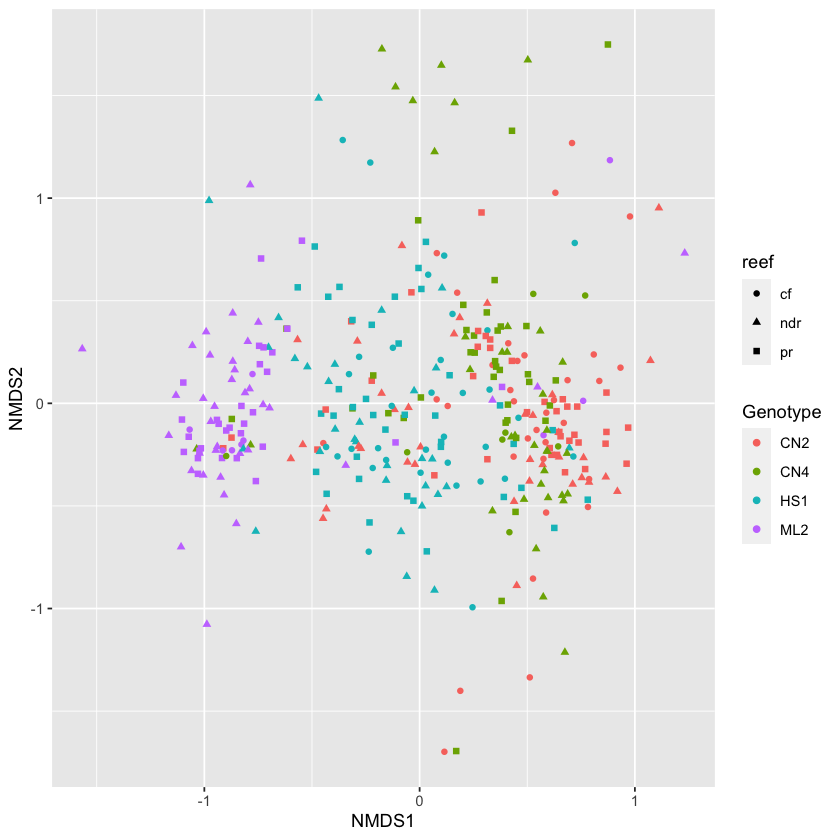

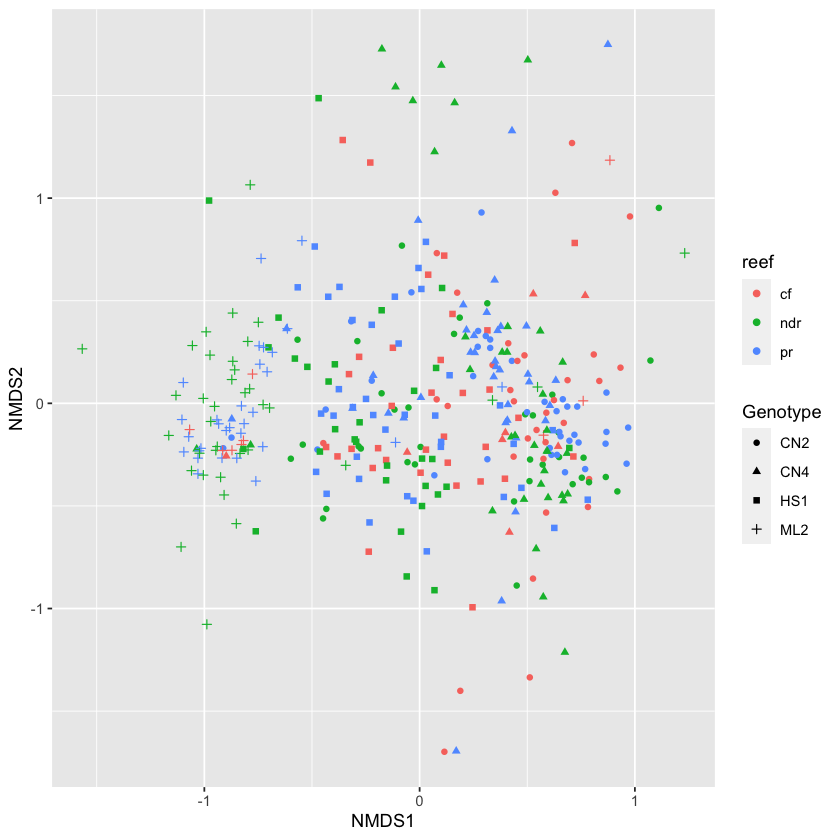

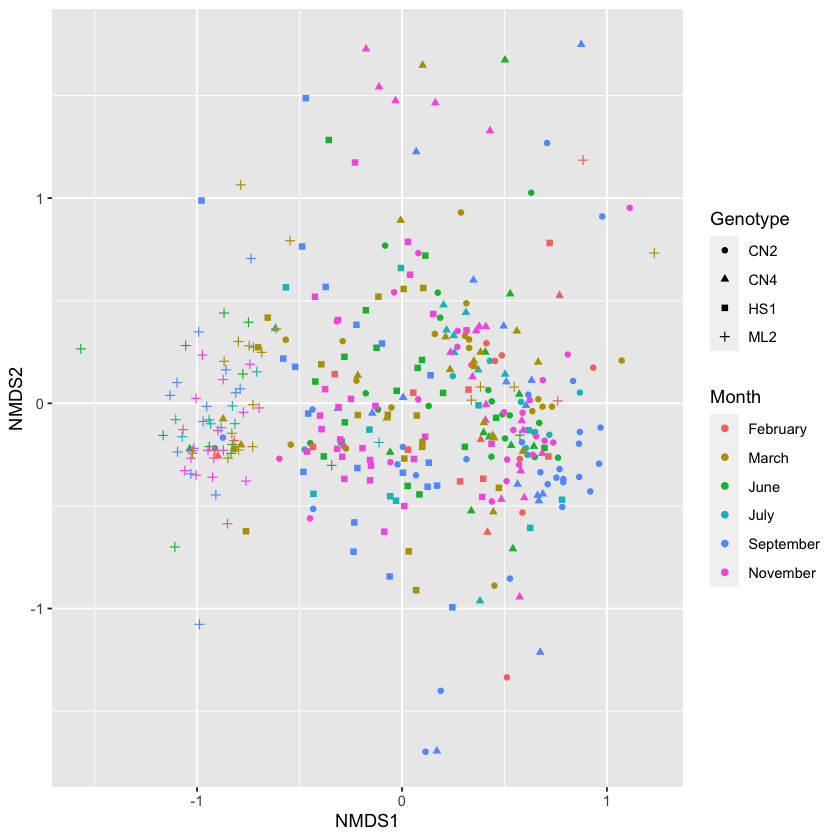

In [13]:
plot_ordination(ps_ra, psr_ra_ord,
                               color="Genotype",
                              shape="reef",
                            axes = c(1,2))


plot_ordination(ps_ra, psr_ra_ord,
                               color="reef",
                              shape="Genotype",
                            axes = c(1,2))


plot_ordination(ps_ra, psr_ra_ord,
                               color="Month",
                              shape="Genotype",
                            axes = c(1,2))


	Homogeneity of multivariate dispersions

Call: betadisper(d = ps_veg, group = sample_data(ps_ra)$Genotype)

No. of Positive Eigenvalues: 137
No. of Negative Eigenvalues: 225

Average distance to median:
   CN2    CN4    HS1    ML2 
0.4278 0.4519 0.4134 0.3638 

Eigenvalues for PCoA axes:
(Showing 8 of 362 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
26.630 11.582  7.526  6.171  4.982  4.142  3.405  3.038 

[1] 363   1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
               diff         lwr          upr     p adj
CN4-CN2  0.02405668 -0.03144615  0.079559518 0.6782156
HS1-CN2 -0.01442976 -0.06620776  0.037348246 0.8893794
ML2-CN2 -0.06406110 -0.12040894 -0.007713253 0.0185837
HS1-CN4 -0.03848644 -0.09456409  0.017591206 0.2888420
ML2-CN4 -0.08811778 -0.14844042 -0.027795145 0.0010888
ML2-HS1 -0.04963134 -0.10654546  0.007282782 0.1117905



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df Sum Sq  Mean Sq      F N.Perm Pr(>F)   
Groups      3 0.3220 0.107331 5.1075    999  0.002 **
Residuals 359 7.5442 0.021014                        
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
          CN2       CN4       HS1   ML2
CN2           0.2880000 0.4150000 0.007
CN4 0.2666458           0.0570000 0.002
HS1 0.3923348 0.0588882           0.023
ML2 0.0063942 0.0017660 0.0250205      

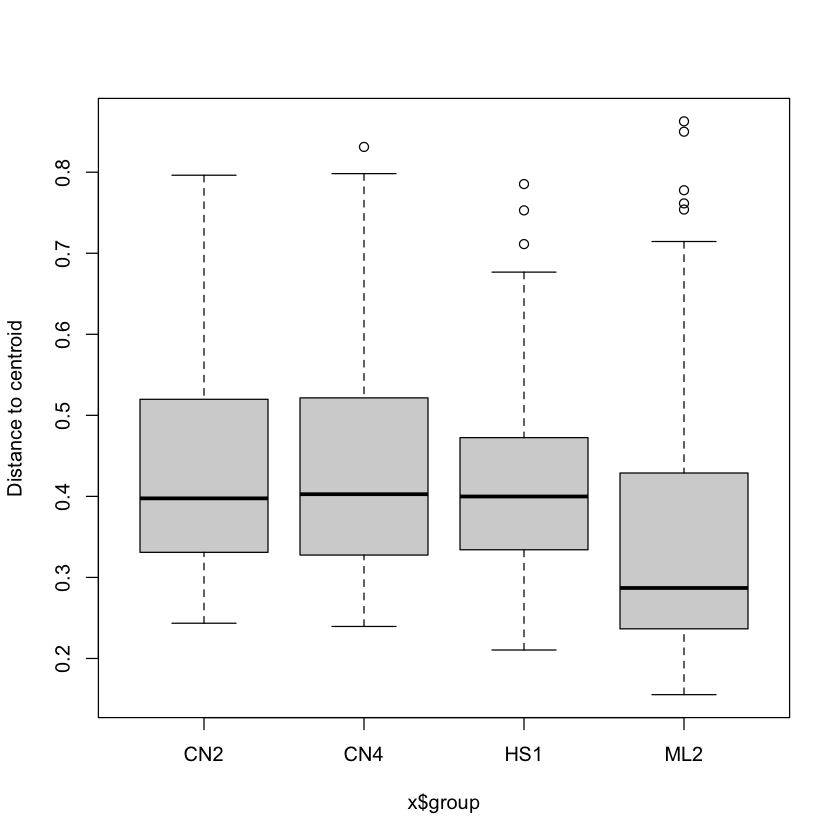

In [378]:
#distances between
ps_veg <- vegdist(otu_table(t(ps_ra)), method ="bray")

mod_geno <- betadisper(ps_veg, sample_data(ps_ra)$Genotype)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
mod_geno

mod_dist= as.data.frame(mod_geno$distances)
dim(mod_dist)
mod_dist_df=cbind(sample_data(ps_ra), mod_dist) 


#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_geno)
permutest(mod_geno, pairwise = TRUE, permutations = 999)
boxplot(mod_geno)






`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
Warning message in ci_f_ncp(stat, df1 = df1, df2 = df2, probs = probs):
“Upper limit outside search range. Set to the maximum of the parameter range.”
Warning message:
“Computation failed in `stat_poly_eq()`
Caused by error in `check_output()`:
! out[1] <= out[2] is not TRUE”
Warning message in ci_f_ncp(stat, df1 = df1, df2 = df2, probs = probs):
“Upper limit outside search range. Set to the maximum of the parameter range.”
Warning message:
“Computation failed in `stat_poly_eq()`
Caused by error in `check_output()`:
! out[1] <= out[2] is not TRUE”
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


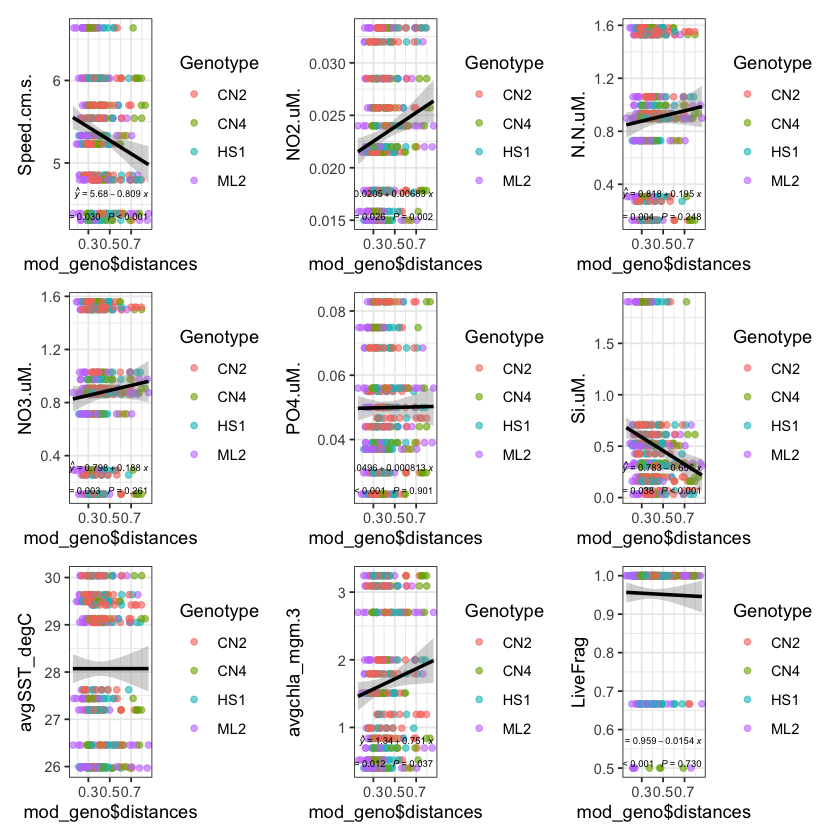

In [379]:
# Create an empty list to store the plots
plots <- list()

# Loop through each y variable and create a plot
for (y_var in y_columns) {
  plot <- mod_dist_df %>%
    ggplot(aes(x = mod_geno$distances, y = .data[[y_var]], color = Genotype)) +
    geom_point(alpha = 0.6) +
    theme_bw() +
    geom_smooth(method = 'lm', color = 'black') +
    
    stat_poly_eq(
      formula = y ~ x,
      eq.with.lhs = "italic(hat(y))~`=`~",
      aes(label = paste(..rr.label.., ..p.value.label.., sep = "~~~")),
      parse = TRUE,
      label.y = "bottom",
      label.x = "right",
      color = "black",
      rr.digits = 3,
      size = 2
    ) +
    
    stat_poly_eq(
      aes(label = paste(..eq.label.., sep = "~~~")),
      label.y = 0.15,
      eq.with.lhs = "italic(hat(y))~`=`~",
      eq.x.rhs = "~italic(x)",
      formula = y ~ x,
      parse = TRUE,
      size = 2,
      label.x = "right",
      color = "black"
    )
  
  # Add the plot to the list
  plots[[y_var]] <- plot
}

# Combine all plots into a single plot
combined_plot <- wrap_plots(plots)

# Print the combined plot
print(combined_plot)

In [17]:
mod_dist_geno= as.data.frame(mod_geno$distances)
dim(mod_dist_geno)
head(mod_dist_geno)

[1] 363   1

,mod_geno$distances
,<dbl>
bagnumber-1009,0.2189952
bagnumber-1010,0.2156217
bagnumber-1011,0.7615171
bagnumber-1013,0.2581734
bagnumber-1014,0.3719411
bagnumber-1015,0.4764038


[1] 363   1

,collection_date,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,Genotype,Fragment_number,Month,⋯,cluster_depth,Year.y,Month.y,Lat_decimal,Long_decimal,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC,mod_geno$distances
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>,⋯,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-1009,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,ML2,B,June,⋯,20.9,2019,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.2189952
bagnumber-1010,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,ML2,3,June,⋯,20.9,2019,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.2156217
bagnumber-1011,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,ML2,4,June,⋯,20.9,2019,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.7615171
bagnumber-1013,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,CN4,3,June,⋯,17.9,2019,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.2581734
bagnumber-1014,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,CN4,4,June,⋯,17.9,2019,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.3719411
bagnumber-1015,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,CN4,5,June,⋯,17.9,2019,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.4764038


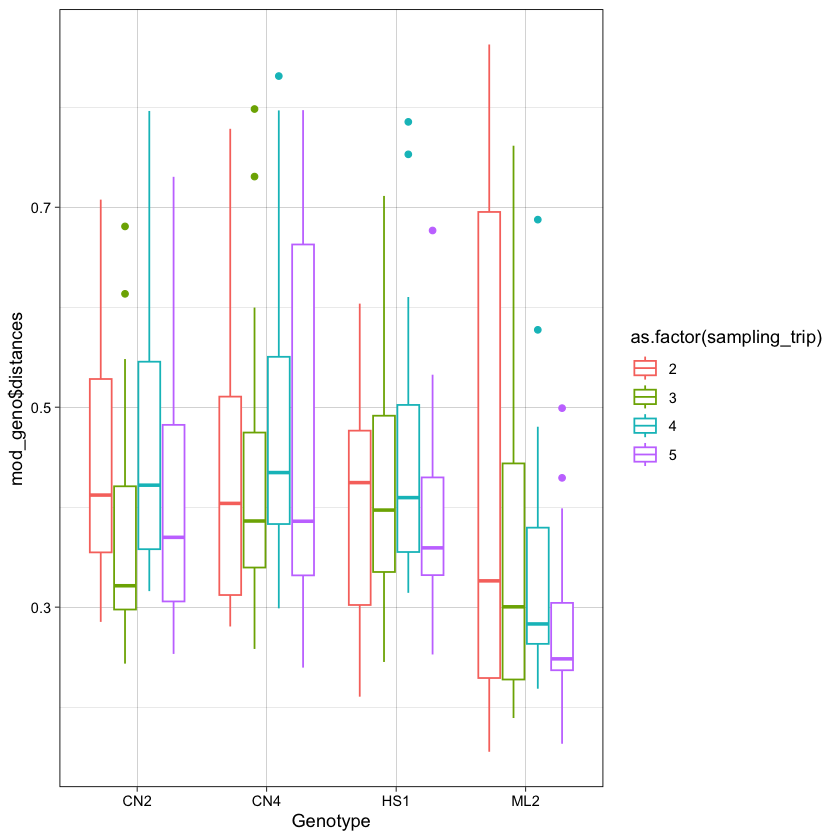

In [18]:
mod_dist_geno= as.data.frame(mod_geno$distances)
dim(mod_dist_geno)

mod_dist_geno_df=cbind(sample_data(ps_ra), mod_dist_geno) 
head(mod_dist_geno_df)



ggplot(mod_dist_geno_df,
       aes(x=Genotype, y=mod_geno$distances)) +
geom_boxplot(aes(color=as.factor(sampling_trip))) +
theme_linedraw() 

In [20]:
dates <- unique(sort(mod_dist_geno_df$collection_date))
mod_dist_geno_df$collection_date <- factor(mod_dist_geno_df$collection_date,labels = dates, ordered = T)

In [21]:
head(mod_dist_geno_df)

,collection_date,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,Genotype,Fragment_number,Month,⋯,cluster_depth,Year.y,Month.y,Lat_decimal,Long_decimal,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC,mod_geno$distances
,<ord>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>,⋯,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-1009,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,ML2,B,June,⋯,20.9,2019,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.2189952
bagnumber-1010,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,ML2,3,June,⋯,20.9,2019,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.2156217
bagnumber-1011,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,ML2,4,June,⋯,20.9,2019,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.7615171
bagnumber-1013,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,CN4,3,June,⋯,17.9,2019,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.2581734
bagnumber-1014,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,CN4,4,June,⋯,17.9,2019,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.3719411
bagnumber-1015,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,CN4,5,June,⋯,17.9,2019,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.4764038



	Homogeneity of multivariate dispersions

Call: betadisper(d = ps_veg, group = sample_data(ps_ra)$reef)

No. of Positive Eigenvalues: 137
No. of Negative Eigenvalues: 225

Average distance to median:
    cf    ndr     pr 
0.4574 0.4925 0.4543 

Eigenvalues for PCoA axes:
(Showing 8 of 362 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
26.630 11.582  7.526  6.171  4.982  4.142  3.405  3.038 

[1] 363   1

,mod_geno$distances
,<dbl>
bagnumber-1009,0.5778144
bagnumber-1010,0.5825098
bagnumber-1011,0.3396178
bagnumber-1013,0.2755016
bagnumber-1014,0.3989480
bagnumber-1015,0.5118722


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
               diff         lwr          upr     p adj
ndr-cf  0.035142257 -0.00140873  0.071693245 0.0624703
pr-cf  -0.003084217 -0.03944135  0.033272914 0.9782677
pr-ndr -0.038226475 -0.06968055 -0.006772403 0.0124291



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df Sum Sq  Mean Sq     F N.Perm Pr(>F)  
Groups      2 0.1182 0.059081 4.726    999  0.012 *
Residuals 360 4.5005 0.012501                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
           cf       ndr    pr
cf            0.0390000 0.839
ndr 0.0303139           0.006
pr  0.8453836 0.0028465      

`geom_smooth()` using formula = 'y ~ x'


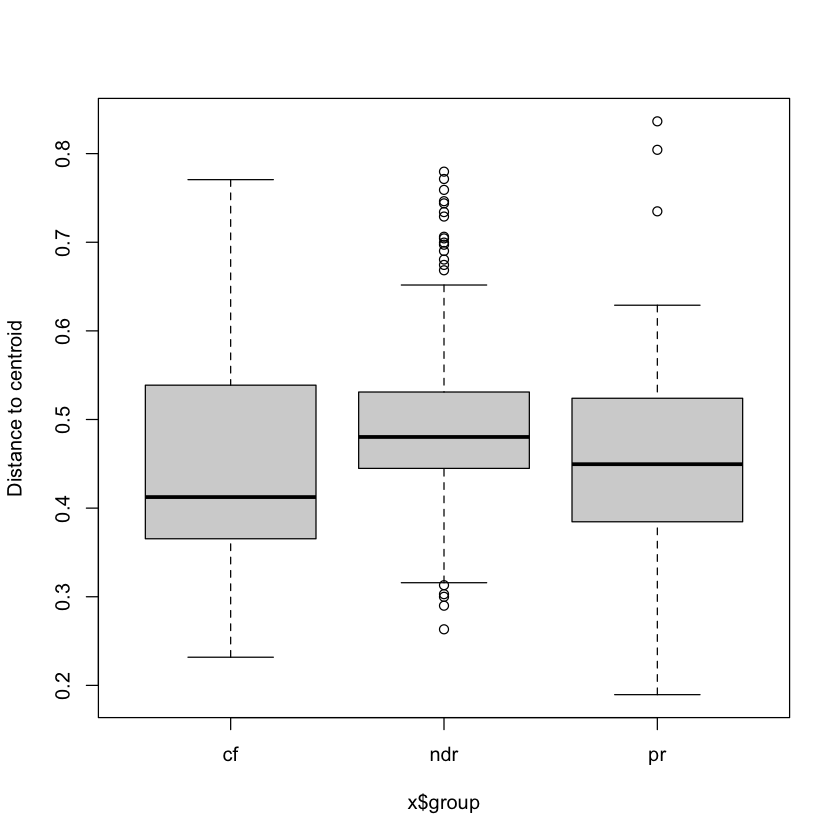

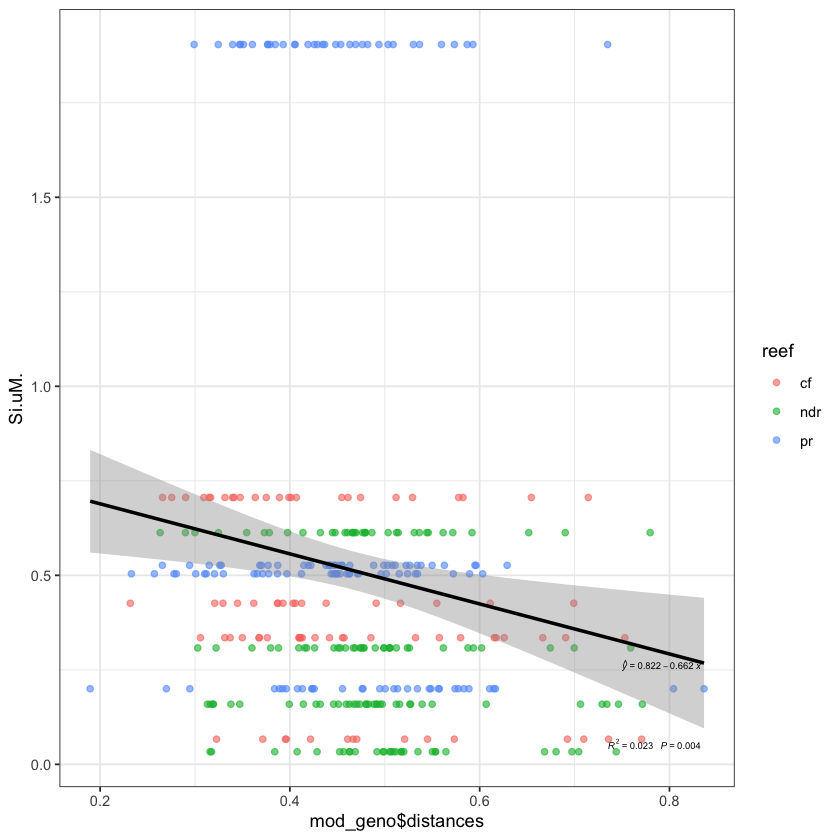

In [368]:
#distances between
ps_veg <- vegdist(otu_table(t(ps_ra)), method ="bray")

mod_geno <- betadisper(ps_veg, sample_data(ps_ra)$reef)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
mod_geno

mod_dist= as.data.frame(mod_geno$distances)
dim(mod_dist)
mod_dist_df=cbind(sample_data(ps_ra), mod_dist) 

#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_geno)
permutest(mod_geno, pairwise = TRUE, permutations = 999)
boxplot(mod_geno)



y_columns <- names(ps_ra_meta_envs[4:12])

# Create an empty list to store the plots
plots <- list()

# Loop through each y variable and create a plot
for (y_var in y_columns) {
  plot <- mod_dist_df %>%
    ggplot(aes(x = mod_geno$distances, y = .data[[y_var]], color = reef)) +
    geom_point(alpha = 0.6) +
    theme_bw() +
    geom_smooth(method = 'lm', color = 'black') +
    
    stat_poly_eq(
      formula = y ~ x,
      eq.with.lhs = "italic(hat(y))~`=`~",
      aes(label = paste(..rr.label.., ..p.value.label.., sep = "~~~")),
      parse = TRUE,
      label.y = "bottom",
      label.x = "right",
      color = "black",
      rr.digits = 3,
      size = 2
    ) +
    
    stat_poly_eq(
      aes(label = paste(..eq.label.., sep = "~~~")),
      label.y = 0.15,
      eq.with.lhs = "italic(hat(y))~`=`~",
      eq.x.rhs = "~italic(x)",
      formula = y ~ x,
      parse = TRUE,
      size = 2,
      label.x = "right",
      color = "black"
    )
  
  # Add the plot to the list
  plots[[y_var]] <- plot
}

# Now, you have a list of plots, and you can access them using y_columns
# For example, to access the plot for the first y variable:
plots[[y_columns[6]]]

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


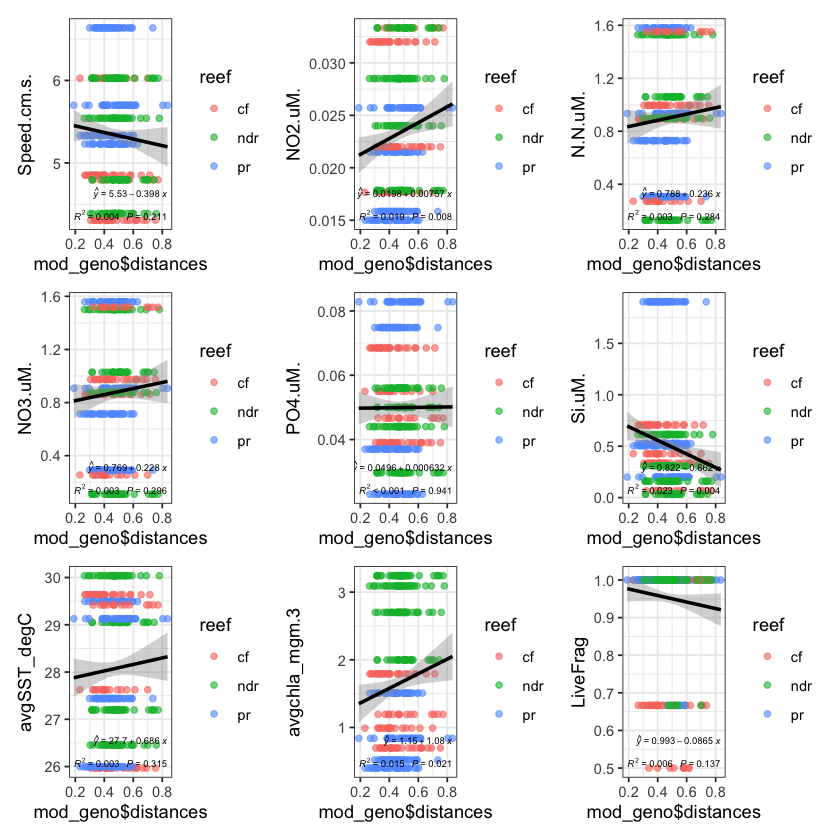

In [369]:
library(ggplot2)
library(ggpmisc)
library(patchwork)

# Assuming your data frame is named mod_dist_geno_df
# You may need to adjust the column names and other details based on your actual data structure

# Extract column names except for the first column (assuming it's the x variable)


# Create an empty list to store the plots
plots <- list()

# Loop through each y variable and create a plot
for (y_var in y_columns) {
  plot <- mod_dist_df %>%
    ggplot(aes(x = mod_geno$distances, y = .data[[y_var]], color = reef)) +
    geom_point(alpha = 0.6) +
    theme_bw() +
    geom_smooth(method = 'lm', color = 'black') +
    
    stat_poly_eq(
      formula = y ~ x,
      eq.with.lhs = "italic(hat(y))~`=`~",
      aes(label = paste(..rr.label.., ..p.value.label.., sep = "~~~")),
      parse = TRUE,
      label.y = "bottom",
      label.x = "right",
      color = "black",
      rr.digits = 3,
      size = 2
    ) +
    
    stat_poly_eq(
      aes(label = paste(..eq.label.., sep = "~~~")),
      label.y = 0.15,
      eq.with.lhs = "italic(hat(y))~`=`~",
      eq.x.rhs = "~italic(x)",
      formula = y ~ x,
      parse = TRUE,
      size = 2,
      label.x = "right",
      color = "black"
    )
  
  # Add the plot to the list
  plots[[y_var]] <- plot
}

# Combine all plots into a single plot
combined_plot <- wrap_plots(plots)

# Print the combined plot
print(combined_plot)



	Homogeneity of multivariate dispersions

Call: betadisper(d = ps_veg, group = sample_data(ps_ra)$Samp_trip)

No. of Positive Eigenvalues: 137
No. of Negative Eigenvalues: 225

Average distance to median:
Trip_2 Trip_3 Trip_4 Trip_5 
0.4587 0.4524 0.4967 0.4675 

Eigenvalues for PCoA axes:
(Showing 8 of 362 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
26.630 11.582  7.526  6.171  4.982  4.142  3.405  3.038 

[1] 363   1

,mod_geno$distances
,<dbl>
bagnumber-1009,0.5077812
bagnumber-1010,0.5305235
bagnumber-1011,0.3816649
bagnumber-1013,0.3091653
bagnumber-1014,0.4127907
bagnumber-1015,0.4977948


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
                      diff           lwr        upr     p adj
Trip_3-Trip_2 -0.006321401 -0.0487053372 0.03606254 0.9805787
Trip_4-Trip_2  0.038016421 -0.0068312411 0.08286408 0.1285261
Trip_5-Trip_2  0.008806803 -0.0346300645 0.05224367 0.9534362
Trip_4-Trip_3  0.044337822 -0.0004070162 0.08908266 0.0531509
Trip_5-Trip_3  0.015128203 -0.0282024918 0.05845890 0.8042222
Trip_5-Trip_4 -0.029209619 -0.0749530760 0.01653384 0.3529996



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df Sum Sq  Mean Sq      F N.Perm Pr(>F)  
Groups      3 0.0974 0.032451 2.4687    999  0.054 .
Residuals 359 4.7190 0.013145                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
         Trip_2   Trip_3   Trip_4 Trip_5
Trip_2          0.668000 0.027000  0.588
Trip_3 0.695971          0.011000  0.345
Trip_4 0.033535 0.013160           0.118
Trip_5 0.593832 0.358852 0.107561       

`geom_smooth()` using formula = 'y ~ x'


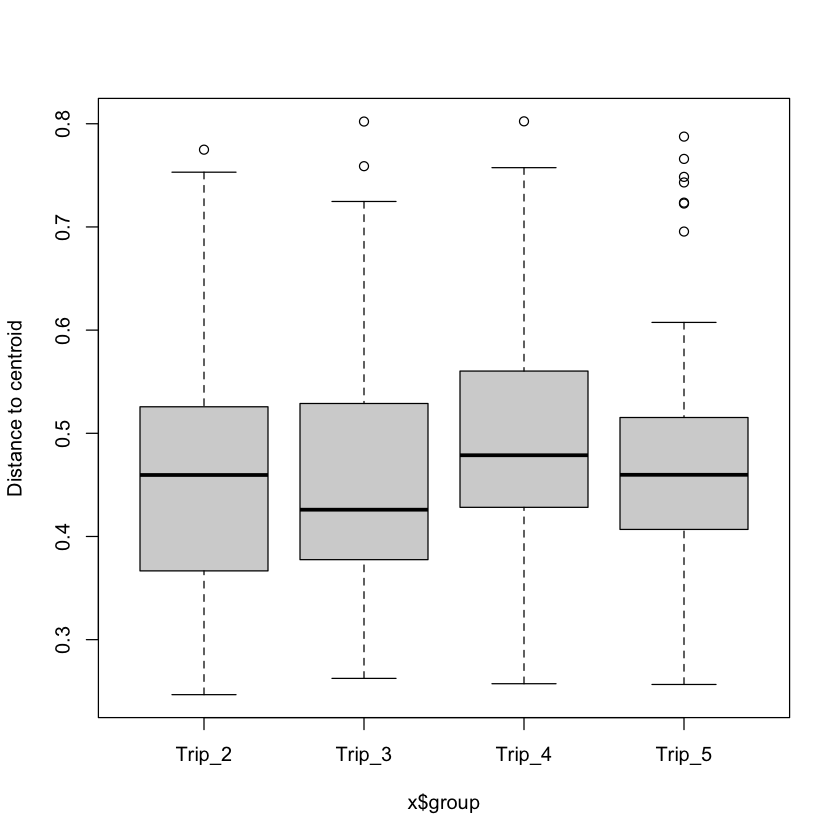

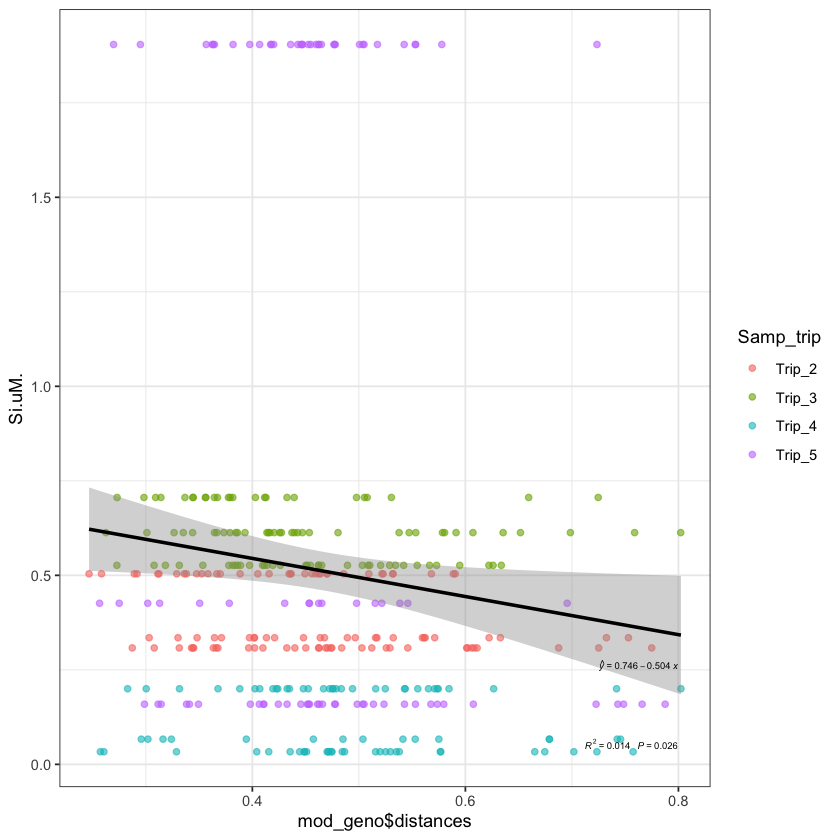

In [370]:
#distances between
ps_veg <- vegdist(otu_table(t(ps_ra)), method ="bray")

mod_geno <- betadisper(ps_veg, sample_data(ps_ra)$Samp_trip)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
mod_geno

mod_dist= as.data.frame(mod_geno$distances)
dim(mod_dist)
mod_dist_df=cbind(sample_data(ps_ra), mod_dist) 
head(mod_dist)

#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_geno)
permutest(mod_geno, pairwise = TRUE, permutations = 999)
boxplot(mod_geno)




y_columns <- names(ps_ra_meta_envs[4:12])

# Create an empty list to store the plots
plots <- list()

# Loop through each y variable and create a plot
for (y_var in y_columns) {
  plot <- mod_dist_df %>%
    ggplot(aes(x = mod_geno$distances, y = .data[[y_var]], color = Samp_trip)) +
    geom_point(alpha = 0.6) +
    theme_bw() +
    geom_smooth(method = 'lm', color = 'black') +
    
    stat_poly_eq(
      formula = y ~ x,
      eq.with.lhs = "italic(hat(y))~`=`~",
      aes(label = paste(..rr.label.., ..p.value.label.., sep = "~~~")),
      parse = TRUE,
      label.y = "bottom",
      label.x = "right",
      color = "black",
      rr.digits = 3,
      size = 2
    ) +
    
    stat_poly_eq(
      aes(label = paste(..eq.label.., sep = "~~~")),
      label.y = 0.15,
      eq.with.lhs = "italic(hat(y))~`=`~",
      eq.x.rhs = "~italic(x)",
      formula = y ~ x,
      parse = TRUE,
      size = 2,
      label.x = "right",
      color = "black"
    )
  
  # Add the plot to the list
  plots[[y_var]] <- plot
}

# Now, you have a list of plots, and you can access them using y_columns
# For example, to access the plot for the first y variable:
plots[[y_columns[6]]]

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


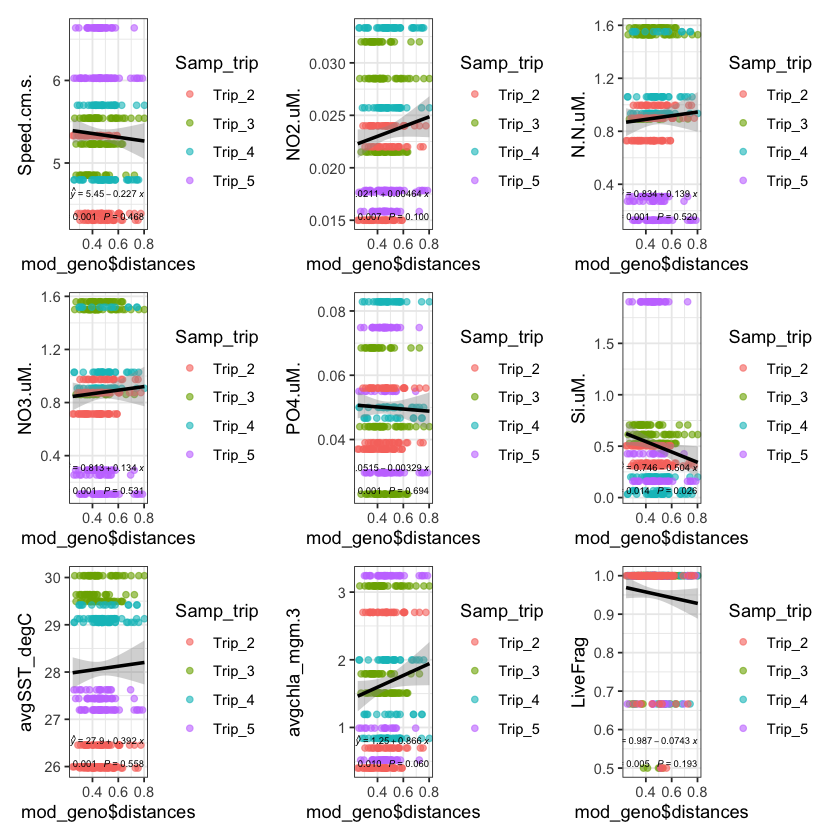

In [372]:
library(ggplot2)
library(ggpmisc)
library(patchwork)

# Assuming your data frame is named mod_dist_geno_df
# You may need to adjust the column names and other details based on your actual data structure

# Extract column names except for the first column (assuming it's the x variable)


# Create an empty list to store the plots
plots <- list()

# Loop through each y variable and create a plot
for (y_var in y_columns) {
  plot <- mod_dist_df %>%
    ggplot(aes(x = mod_geno$distances, y = .data[[y_var]], color = Samp_trip)) +
    geom_point(alpha = 0.6) +
    theme_bw() +
    geom_smooth(method = 'lm', color = 'black') +
    
    stat_poly_eq(
      formula = y ~ x,
      eq.with.lhs = "italic(hat(y))~`=`~",
      aes(label = paste(..rr.label.., ..p.value.label.., sep = "~~~")),
      parse = TRUE,
      label.y = "bottom",
      label.x = "right",
      color = "black",
      rr.digits = 3,
      size = 2
    ) +
    
    stat_poly_eq(
      aes(label = paste(..eq.label.., sep = "~~~")),
      label.y = 0.15,
      eq.with.lhs = "italic(hat(y))~`=`~",
      eq.x.rhs = "~italic(x)",
      formula = y ~ x,
      parse = TRUE,
      size = 2,
      label.x = "right",
      color = "black"
    )
  
  # Add the plot to the list
  plots[[y_var]] <- plot
}

# Combine all plots into a single plot
combined_plot <- wrap_plots(plots)

# Print the combined plot
print(combined_plot)

In [24]:
ps_ra_df=as.data.frame(otu_table(ps_ra))
ps_ra_meta= as(sample_data(ps_ra), "data.frame")


In [26]:
  p <- pca(ps_ra_df, metadata =ps_ra_meta, 
           removeVar = 0.1)

-- removing the lower 10% of variables based on variance



In [27]:
colnames(ps_ra_meta)

[1] "collection_date"       "Speed.cm.s."           "Bearing.degrees."     
 [4] "Velocity.N.cm.s."      "Velocity.E.cm.s."      "Temperature.C."       
 [7] "reef"                  "Genotype"              "Fragment_number"      
[10] "Month"                 "Year"                  "Fragment_num"         
[13] "day"                   "Survey."               "LiveFrag"             
[16] "L"                     "W"                     "H"                    
[19] "Adjusted.Area"         "S01FragCount"          "Year.x"               
[22] "Si.uM."                "NO2.uM."               "N.N.uM."              
[25] "NO3.uM."               "PO4.uM."               "sample_ID"            
[28] "sample_ID2"            "Health"                "Month.x"              
[31] "Samp_trip"             "joining_info"          "order"                
[34] "species"               "time_Reef"             "Cluster"              
[37] "sampling_trip"         "X"                     "colour_reef"          
[40] "colour_genotype"       "colour_reef_genotype"  "colour_timepoint"     
[43] "colour_timepoint_reef" "cluster_latitude"      "cluster_longitude"    
[46] "cluster_depth"         "Year.y"                "Month.y"              
[49] "Lat_decimal"           "Long_decimal"          "avgchla_mgm.3"        
[52] "sdchla_mgm.3"          "avgSST_degC"           "sdSST_degC"

Warning message in eigencorplot(p, metavars = c("Si.uM.", "NO2.uM.", "N.N.uM.", :
“Samp_trip is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(p, metavars = c("Si.uM.", "NO2.uM.", "N.N.uM.", :
“reef is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(p, metavars = c("Si.uM.", "NO2.uM.", "N.N.uM.", :
“Genotype is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.def

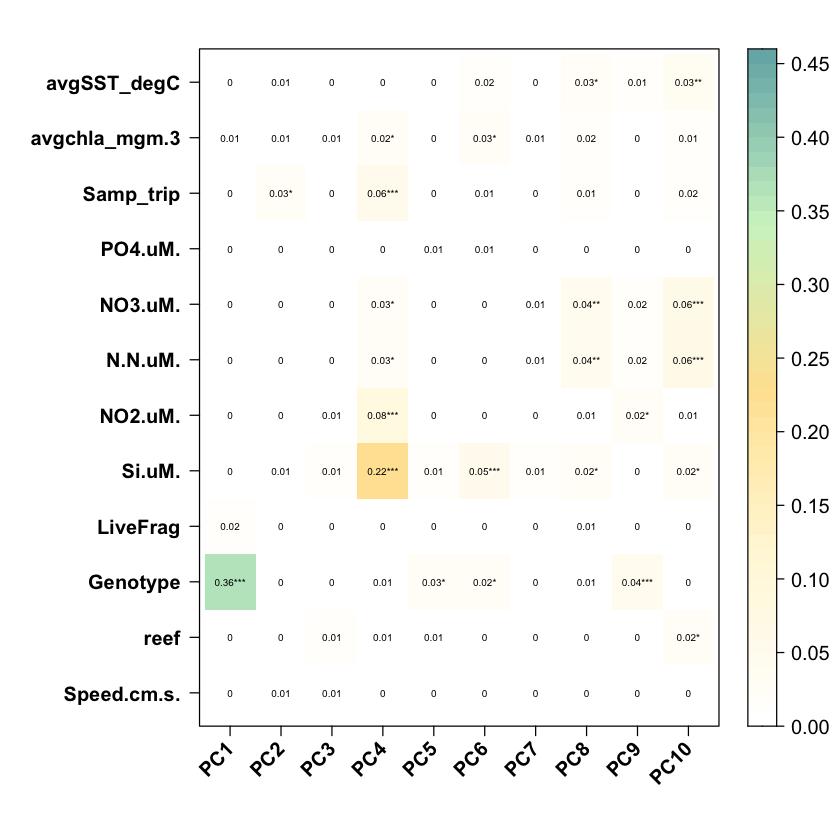

In [313]:
 eigencorplot(p,
    metavars = c('Si.uM.', 'NO2.uM.', 'N.N.uM.', 'NO3.uM.', 'PO4.uM.', "Samp_trip", "avgchla_mgm.3", "reef", "Genotype",
                "Speed.cm.s.", "avgSST_degC",
                "LiveFrag"),
              col = c('white', 'cornsilk1', "#FFE4A1",  '#CFF3CA', "#77B3B5"),
    cexCorval = 0.5,
    fontCorval = 0.5,
    cexTitleX = 4,
    
    #posLab = 'all',
    rotLabX = 45,
    scale = TRUE,
    plotRsquared = TRUE,
    corFUN = 'spearman',
    corUSE = 'pairwise.complete.obs',
    corMultipleTestCorrection = 'BH')

In [380]:
meta_envs= meta %>%
select("Genotype", "Samp_trip", "reef",'Speed.cm.s.', 'NO2.uM.', 'N.N.uM.', 'NO3.uM.', 'PO4.uM.', 'Si.uM.',
                "Speed.cm.s.", "avgSST_degC", "avgchla_mgm.3","LiveFrag", "Temperature.C.")
head(meta_envs, n=2)

,Genotype,Samp_trip,reef,Speed.cm.s.,NO2.uM.,N.N.uM.,NO3.uM.,PO4.uM.,Si.uM.,avgSST_degC,avgchla_mgm.3,LiveFrag,Temperature.C.
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-584,CN2,Trip_2,pr,5.331549,0.015,0.729,0.714,0.037,0.504,25.99442,0.3999531,1,26.09619
bagnumber-590,CN2,Trip_2,pr,5.331549,0.015,0.729,0.714,0.037,0.504,25.99442,0.3999531,1,26.09619


In [30]:
library("GGally")

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



Warning message in ggcorr(meta_envs, geom = "circle", nbreaks = 5):
“data in column(s) 'Genotype', 'Samp_trip', 'reef' are not numeric and were ignored”


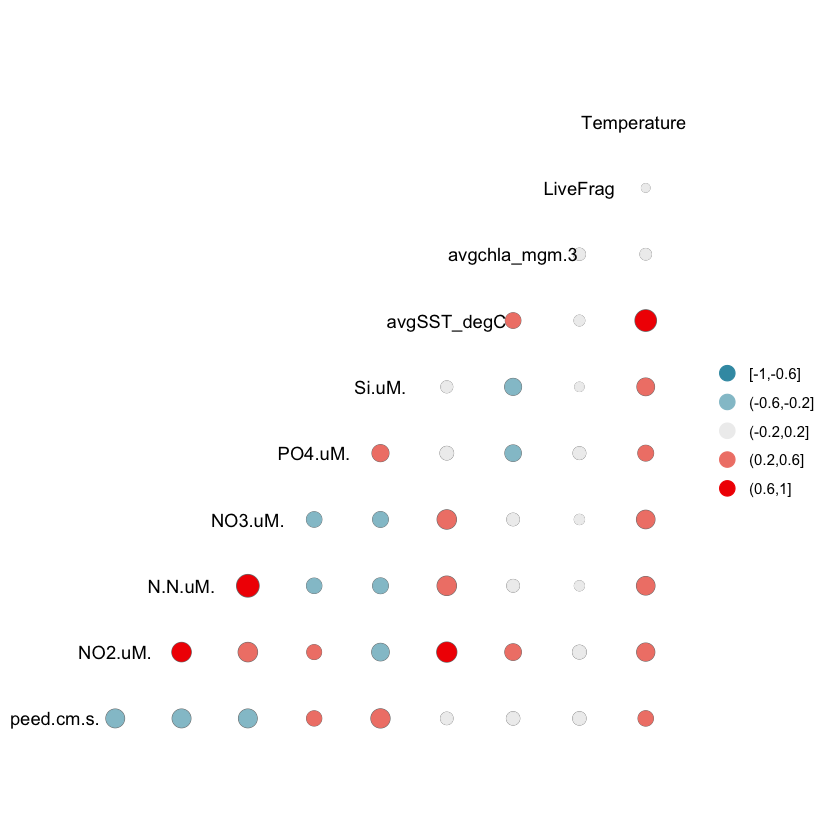

In [381]:
ggcorr(meta_envs, geom = "circle", nbreaks = 5)

In [382]:

#  adonis(formula = abund_table ~ ., data = meta_table) 

adonis2(ps_veg~., 
       data =meta_envs, 
         method = "bray", permutations = 999)

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Genotype,3,1.10464938,0.0126911848,1.6803742,0.027
Samp_trip,3,2.51506667,0.0288953005,3.8258773,0.001
reef,2,1.64410376,0.0188889116,3.7514747,0.001
Speed.cm.s.,1,1.05068357,0.0120711780,4.7948468,0.001
NO2.uM.,1,0.63014590,0.0072396710,2.8757022,0.012
N.N.uM.,1,3.18043702,0.0365396610,14.5140827,0.001
NO3.uM.,1,0.19150826,0.0022002155,0.8739575,0.501
PO4.uM.,1,0.40587034,0.0046629959,1.8522095,0.084
Si.uM.,1,0.04853605,0.0005576249,0.2214967,0.995


In [326]:
adonis2(ps_veg~Genotype, 
       data =ps_ra_meta, permutations = 999, 
         method = "bray")

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Genotype,3,16.97380,0.19501,28.98942,0.001
Residual,359,70.06688,0.80499,NA,NA
Total,362,87.04068,1.00000,NA,NA


In [383]:
ps_ra_meta_envs = ps_ra_meta %>% select("Genotype", "Samp_trip", "reef",'Speed.cm.s.', 'NO2.uM.', 'N.N.uM.', 'NO3.uM.', 'PO4.uM.', 'Si.uM.',
                "Speed.cm.s.", "avgSST_degC", "avgchla_mgm.3","LiveFrag", "Temperature.C.")

In [384]:
dim(ps_ra_meta_envs)
head(ps_ra_meta_envs)

[1] 363  13

,Genotype,Samp_trip,reef,Speed.cm.s.,NO2.uM.,N.N.uM.,NO3.uM.,PO4.uM.,Si.uM.,avgSST_degC,avgchla_mgm.3,LiveFrag,Temperature.C.
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-1009,ML2,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,0.5,30.40801
bagnumber-1010,ML2,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,0.5,30.40801
bagnumber-1011,ML2,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,0.5,30.40801
bagnumber-1013,CN4,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,1.0,30.40801
bagnumber-1014,CN4,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,0.5,30.40801
bagnumber-1015,CN4,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,0.5,30.40801


In [331]:
dim(otu_table(ps_ra))

[1] 377 363

In [385]:
#find correlations in metadata
c1 <- cor(ps_ra_meta_envs[4:13])
c1

,Speed.cm.s.,NO2.uM.,N.N.uM.,NO3.uM.,PO4.uM.,Si.uM.,avgSST_degC,avgchla_mgm.3,LiveFrag,Temperature.C.
Speed.cm.s.,1.00000000,-0.5264729,-0.52950334,-0.52710713,0.22879390,0.574997758,0.08343963,-0.12016822,0.1194374886,0.2407624984
NO2.uM.,-0.52647292,1.0000000,0.60372598,0.59562409,0.20578611,-0.411263133,0.68147710,0.33038031,-0.1466219001,0.4658315003
N.N.uM.,-0.52950334,0.6037260,1.00000000,0.99994785,-0.23913428,-0.267320218,0.59681623,0.09045020,0.0149358783,0.5048473507
NO3.uM.,-0.52710713,0.5956241,0.99994785,1.00000000,-0.24406894,-0.263970606,0.59245394,0.08694631,0.0169308223,0.5026963718
PO4.uM.,0.22879390,0.2057861,-0.23913428,-0.24406894,1.00000000,0.366359299,0.13338813,-0.32015226,-0.0950008525,0.2718520592
Si.uM.,0.57499776,-0.4112631,-0.26732022,-0.26397061,0.36635930,1.000000000,-0.05954307,-0.35869035,-0.0048927043,0.4247565632
avgSST_degC,0.08343963,0.6814771,0.59681623,0.59245394,0.13338813,-0.059543075,1.00000000,0.25505921,-0.0274256494,0.8565268145
avgchla_mgm.3,-0.12016822,0.3303803,0.09045020,0.08694631,-0.32015226,-0.358690355,0.25505921,1.00000000,0.0698891506,0.0475500589
LiveFrag,0.11943749,-0.1466219,0.01493588,0.01693082,-0.09500085,-0.004892704,-0.02742565,0.06988915,1.0000000000,0.0006665622
Temperature.C.,0.24076250,0.4658315,0.50484735,0.50269637,0.27185206,0.424756563,0.85652681,0.04755006,0.0006665622,1.0000000000


In [334]:
#remove co-variate
ps_ra_meta_envs2 = ps_ra_meta %>% select('NO2.uM.', 'N.N.uM.', 'PO4.uM.', 'Si.uM.',
                "Speed.cm.s.", "avgSST_degC", "avgchla_mgm.3", "LiveFrag")

In [335]:
#run ordistep for model selection
set.seed(43)
mod0 <- cca(t(otu_table(ps_ra)) ~ 1, ps_ra_meta_envs2)
# Model with all explanatory variables
mod1 <- cca(t(otu_table(ps_ra)) ~ ., ps_ra_meta_envs2)
## With scope present, the default direction is "both"
m <- ordistep(mod0, scope = formula(mod1), perm.max = 200, direction ="forward")
m


Start: t(otu_table(ps_ra)) ~ 1 

                Df    AIC      F Pr(>F)   
+ avgchla_mgm.3  1 831.40 2.5967  0.005 **
+ NO2.uM.        1 831.49 2.5036  0.005 **
+ avgSST_degC    1 832.05 1.9434  0.005 **
+ N.N.uM.        1 832.26 1.7345  0.005 **
+ Si.uM.         1 832.62 1.3735  0.125   
+ Speed.cm.s.    1 832.89 1.1042  0.330   
+ LiveFrag       1 832.98 1.0150  0.400   
+ PO4.uM.        1 833.14 0.8538  0.740   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Step: t(otu_table(ps_ra)) ~ avgchla_mgm.3 

              Df    AIC      F Pr(>F)   
+ NO2.uM.      1 830.65 2.7365  0.005 **
+ avgSST_degC  1 831.24 2.1500  0.005 **
+ N.N.uM.      1 831.49 1.8978  0.005 **
+ Si.uM.       1 832.05 1.3439  0.115   
+ Speed.cm.s.  1 832.18 1.2149  0.120   
+ LiveFrag     1 832.37 1.0200  0.395   
+ PO4.uM.      1 832.52 0.8714  0.740   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Step: t(otu_table(ps_ra)) ~ avgchla_mgm.3 + NO2.uM. 

              Df 

Call: cca(formula = t(otu_table(ps_ra)) ~ avgchla_mgm.3 + NO2.uM., data
= ps_ra_meta_envs2)

              Inertia Proportion Rank
Total         9.84045    1.00000     
Constrained   0.14399    0.01463    2
Unconstrained 9.69647    0.98537  360
Inertia is scaled Chi-square 

Eigenvalues for constrained axes:
   CCA1    CCA2 
0.08107 0.06292 

Eigenvalues for unconstrained axes:
   CA1    CA2    CA3    CA4    CA5    CA6    CA7    CA8 
0.6629 0.5236 0.4805 0.4616 0.4409 0.4292 0.4173 0.3971 
(Showing 8 of 360 unconstrained eigenvalues)


In [336]:
vif.cca(m)

avgchla_mgm.3       NO2.uM. 
     1.122525      1.122525

In [344]:
#cca ordination
cca_ps <- ordinate(
  physeq = ps_ra, 
  method = "CCA",
 distance = bray,
  formula =   ~ NO2.uM. + N.N.uM. + PO4.uM. + Si.uM. +
                Speed.cm.s. + avgSST_degC + avgchla_mgm.3)

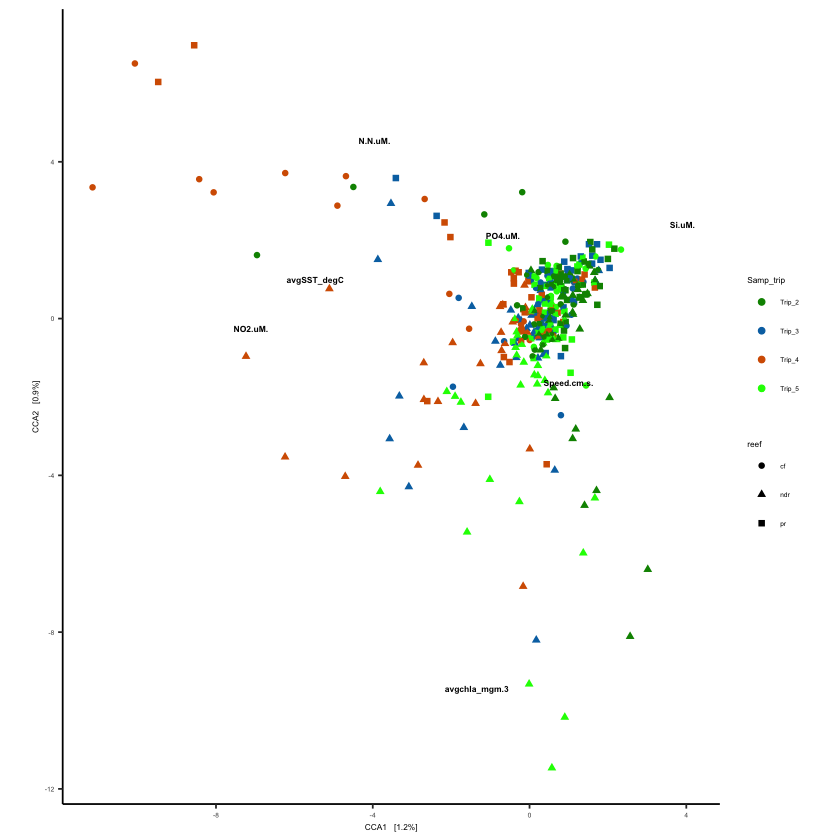

In [345]:
p0 = plot_ordination(ps_ra, cca_ps, color = "Samp_trip", shape ="reef") +
geom_point(size = 1) +
scale_color_manual(values=c("#009000", "#0072B2", "#D55E00", "green", "yellow", "pink"))
# Now add the environmental variables as arrows
arrowmat = vegan::scores(cca_ps, display = "bp")
# Add labels, make a data.frame
arrowdf <- data.frame(labels = rownames(arrowmat), arrowmat)
# Define the arrow aesthetic mapping
arrow_map = aes(xend = CCA1, yend = CCA2, x = 0, y = 0, shape = NULL, color = NULL, 
    label = labels)
label_map = aes(x = 10 * CCA1, y = 11 * CCA2, shape = NULL, color = NULL, 
    label = labels)
# Make a new graphic
arrowhead = arrow(length = unit(1,"cm"))
p1 = p0 +
#geom_segment(arrow_map, size = 0.3, data = arrowdf, color = "black", 
 #   arrow = arrowhead) + 

geom_text(label_map, size = 1.8, data = arrowdf ,fontface = "bold", hjust=0.8, vjust=0.8, angle=0) +
theme_classic() +
theme(legend.text =element_text(size=3.7)) +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 5)) +
theme(axis.text.x = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=5)) +
  coord_fixed() 
p1

ggsave("/Users/stephanie.rosales/Desktop/fig.png",
       width = 4, height = 4, units = "in", dpi=300)